# GloVe Model Implementation

## Importing Necessary Libraries

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Getting the Word Vectors

In [ ]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


## Let us explore some of the vectors

In [ ]:
glove_model["king"]

array([ 0.0033901, -0.34614  ,  0.28144  ,  0.48382  ,  0.59469  ,
        0.012965 ,  0.53982  ,  0.48233  ,  0.21463  , -1.0249   ,
       -0.34788  , -0.79001  , -0.15084  ,  0.61374  ,  0.042811 ,
        0.19323  ,  0.25462  ,  0.32528  ,  0.05698  ,  0.063253 ,
       -0.49439  ,  0.47337  , -0.16761  ,  0.045594 ,  0.30451  ,
       -0.35416  , -0.34583  , -0.20118  ,  0.25511  ,  0.091111 ,
        0.014651 , -0.017541 , -0.23854  ,  0.48215  , -0.9145   ,
       -0.36235  ,  0.34736  ,  0.028639 , -0.027065 , -0.036481 ,
       -0.067391 , -0.23452  , -0.13772  ,  0.33951  ,  0.13415  ,
       -0.1342   ,  0.47856  , -0.1842   ,  0.10705  , -0.45834  ,
       -0.36085  , -0.22595  ,  0.32881  , -0.13643  ,  0.23128  ,
        0.34269  ,  0.42344  ,  0.47057  ,  0.479    ,  0.074639 ,
        0.3344   ,  0.10714  , -0.13289  ,  0.58734  ,  0.38616  ,
       -0.52238  , -0.22028  , -0.072322 ,  0.32269  ,  0.44226  ,
       -0.037382 ,  0.18324  ,  0.058082 ,  0.26938  ,  0.3620

In [ ]:
glove_model["france"]

array([-5.5966e-02,  3.3098e-01, -4.8706e-01, -6.3245e-01,  7.2906e-02,
        5.4625e-01, -4.0818e-02, -6.8302e-02,  1.7669e-02, -1.7192e+00,
        6.3679e-01, -1.4927e-01,  2.1591e-01, -4.5068e-01,  3.0043e-01,
        2.1499e-01, -7.4140e-02,  5.5876e-01,  1.0662e-01,  2.8551e-01,
       -3.6890e-01,  7.2203e-01,  1.5396e-01,  1.1345e-01, -6.0126e-01,
       -5.7111e-01,  4.1505e-01, -2.0347e-01,  1.6531e-01,  6.3124e-01,
       -7.7005e-01, -3.0260e-01, -5.0839e-01,  5.5926e-01, -1.0380e+00,
       -6.8186e-01,  5.7905e-01, -4.2094e-01, -3.8880e-01, -1.9517e-01,
       -4.3155e-01, -3.1099e-01,  3.6055e-01, -3.9106e-01, -5.8718e-01,
       -1.5774e-01,  1.3408e-01,  7.5595e-01,  1.6151e-01, -3.7458e-01,
        1.0214e-01,  1.2893e-01,  9.7270e-01, -5.8133e-01,  4.4972e-01,
        2.0030e-02, -3.5883e-01, -6.3266e-02,  4.7629e-01, -4.0336e-01,
       -3.7269e-01,  5.6424e-01, -5.2578e-01, -2.4461e-01, -7.8740e-01,
       -8.1476e-01,  3.1068e-01,  5.5933e-02, -3.7837e-01, -2.65

## Let us find Most Similar Words for a given word with the model

In [ ]:
glove_model.most_similar("girl")

[('boy', 0.8272891044616699),
 ('woman', 0.729641854763031),
 ('girls', 0.7227291464805603),
 ('teenager', 0.650977373123169),
 ('teenage', 0.6492719650268555),
 ('mother', 0.6417974829673767),
 ('boys', 0.6283578872680664),
 ('child', 0.6229295134544373),
 ('teen', 0.612524151802063),
 ('daughter', 0.6050207614898682)]

In [ ]:
glove_model.most_similar("france")

[('french', 0.7344760894775391),
 ('paris', 0.6580672264099121),
 ('belgium', 0.620672345161438),
 ('spain', 0.573593258857727),
 ('italy', 0.5643459558486938),
 ('germany', 0.5567397475242615),
 ('prohertrib', 0.5564222931861877),
 ('britain', 0.5553334951400757),
 ('chirac', 0.5362644195556641),
 ('switzerland', 0.5320892333984375)]

In [ ]:
glove_model.most_similar("king")

[('queen', 0.6336469054222107),
 ('prince', 0.619662344455719),
 ('monarch', 0.5899620652198792),
 ('kingdom', 0.5791267156600952),
 ('throne', 0.5606487989425659),
 ('ii', 0.5562329888343811),
 ('iii', 0.5503199100494385),
 ('crown', 0.5224862694740295),
 ('reign', 0.521735429763794),
 ('kings', 0.5066401362419128)]

## Let us try some basic operations with the model

In [ ]:
glove_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.6713277101516724),
 ('princess', 0.5432624220848083),
 ('throne', 0.5386104583740234),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.498025119304657)]

### The above cell proves the equation `king - man + woman = queen `

In [ ]:
glove_model.most_similar(positive=['france', 'italy'], negative=['paris'], topn=1)

[('spain', 0.5659100413322449)]

### The above cell describes relations between Countries and their capitals

## Visualizations of the Model

### Plot for most similar words in the model

#### Importing the required libraries

In [ ]:
from gensim.models.fasttext import FastText
from gensim.scripts.word2vec2tensor import word2vec2tensor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
keywords = ['king', 'france', 'boy', 'apple', 'lion', 'seven', 'rose', 'knowledge', 'learning', 'embeddings']
similar_words = {search_term: [item[0] for item in glove_model.most_similar([search_term], topn = 7)]
                  for search_term in keywords}
print(similar_words)

{'king': ['queen', 'prince', 'monarch', 'kingdom', 'throne', 'ii', 'iii'], 'france': ['french', 'paris', 'belgium', 'spain', 'italy', 'germany', 'prohertrib'], 'boy': ['girl', 'boys', 'kid', 'man', 'teenage', 'child', 'teenager'], 'apple': ['iphone', 'macintosh', 'ipod', 'microsoft', 'ipad', 'intel', 'ibm'], 'lion': ['elephant', 'dragon', 'leopard', 'bear', 'lions', 'beast', 'golden'], 'seven': ['eight', 'five', 'nine', 'six', 'four', 'three', 'two'], 'rose': ['fell', 'climbed', 'surged', 'jumped', 'soared', 'percent', 'slipped'], 'knowledge': ['understanding', 'expertise', 'information', 'skills', 'learning', 'experience', 'scientific'], 'learning': ['learn', 'teaching', 'skills', 'learned', 'teach', 'knowledge', 'experience'], 'embeddings': ['graphs', 'embedding', 'immersions', 'manifolds', 'eigenvalues', '2-dimensional', 'nonnegative']}


In [ ]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = glove_model[words]

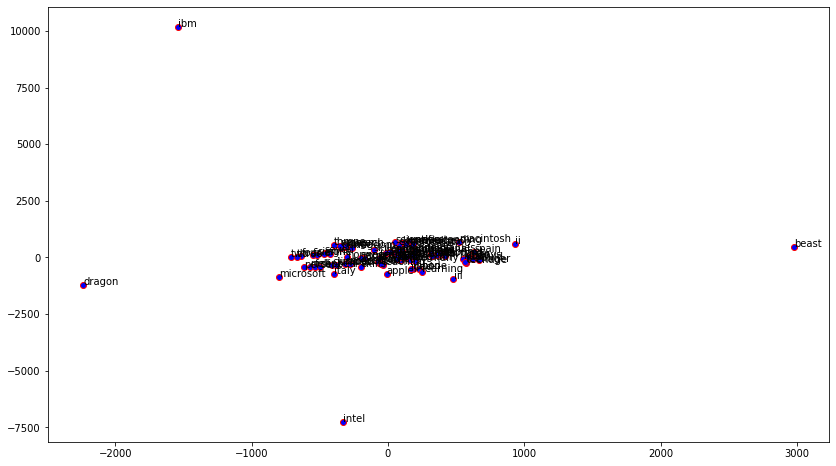

In [ ]:
tsne = TSNE(n_components = 2, random_state = 0, n_iter = 10000, perplexity = 2)
np.set_printoptions(suppress = True)
T = tsne.fit_transform(wvs)
labels = words
plt.figure(figsize = (14, 8))
plt.scatter(T[:, 0], T[:, 1], c = 'blue', edgecolors = 'r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy = (x + 1, y + 1), xytext = (0, 0), textcoords = 'offset points')
plt.savefig("glove_mostsimilar_tsne.png", dpi=150, bbox_inches='tight')
plt.show()

### Let us plot the Complete Embedding Space

#### Importing the required libraries for plotting

In [ ]:
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in glove_model.vocab:
    word_vectors_matrix[i] = glove_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 300)


In [ ]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [ ]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


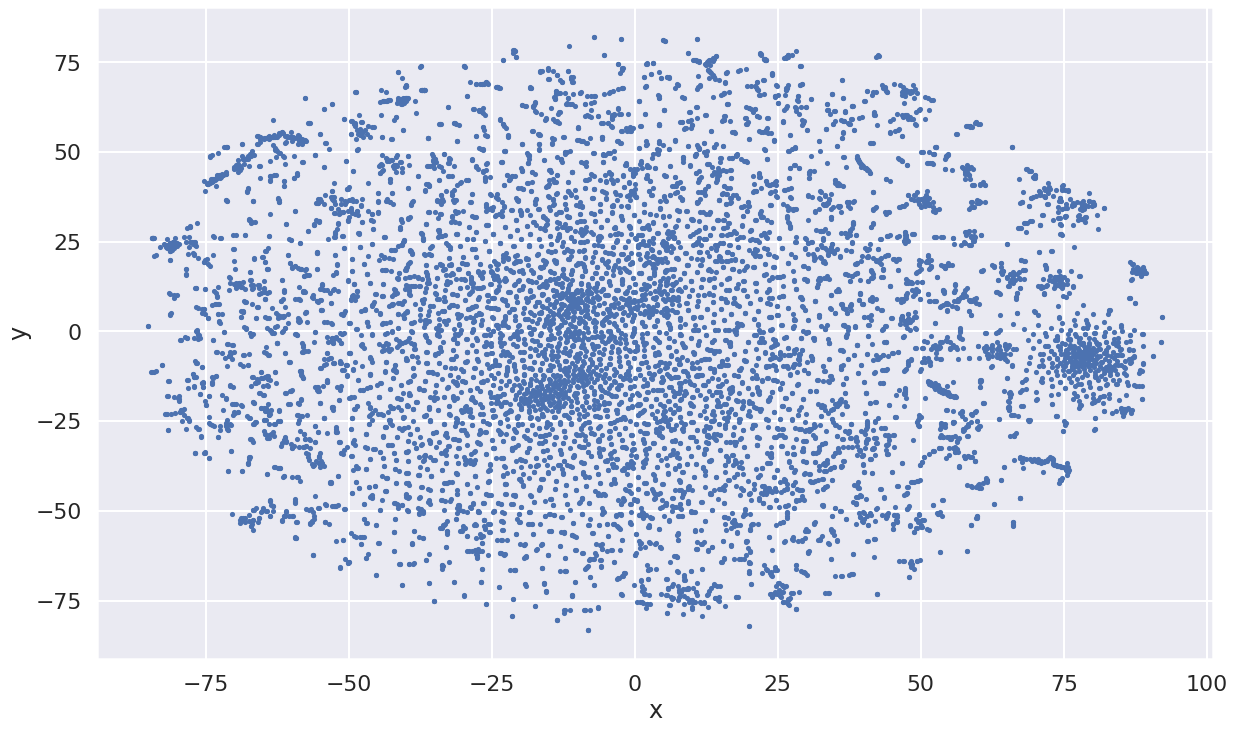

In [ ]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

### PCA Visualisation for Most Similar words for the model 

In [ ]:
keys = ['king', 'china', 'human', 'money', 'war', 'nine', 'popular', 'political', 'rose', 'seven', 'france', 'woman', 'jupiter', 'earth', 'knowledge', 'technology', 'space', 'beautiful', 'google', 'spain']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in glove_model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(glove_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

#### Importing required libraries

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
pca_model_en_2d = PCA(n_components=2)
embeddings_en_2d = np.array(pca_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

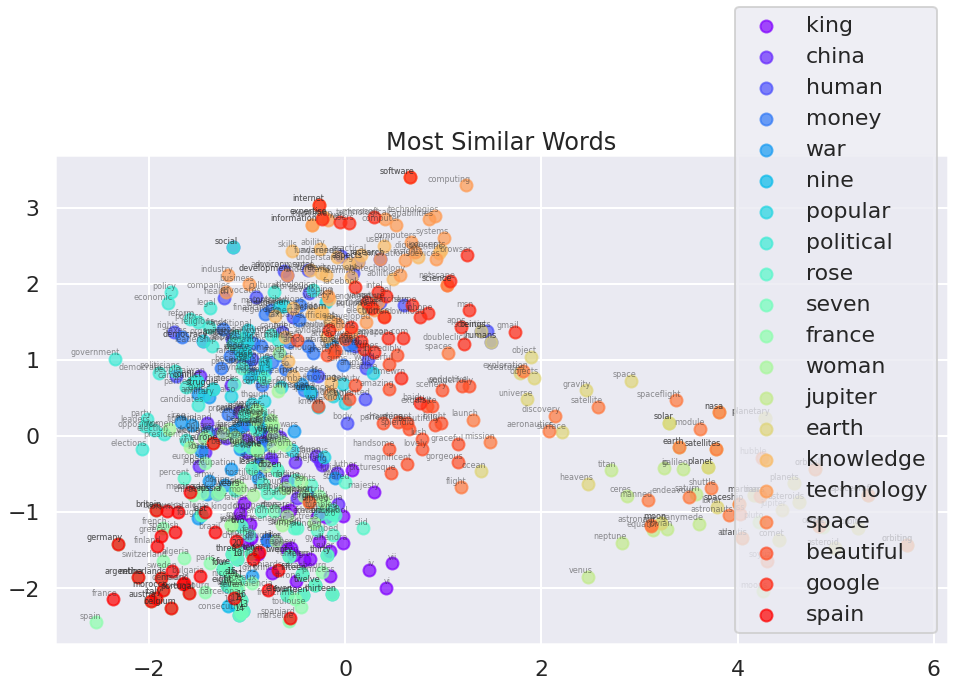

In [ ]:
import matplotlib.cm as cm
% matplotlib inline


def pca_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


pca_plot_similar_words('Most Similar Words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'glove_mostsimilar_pca.png')

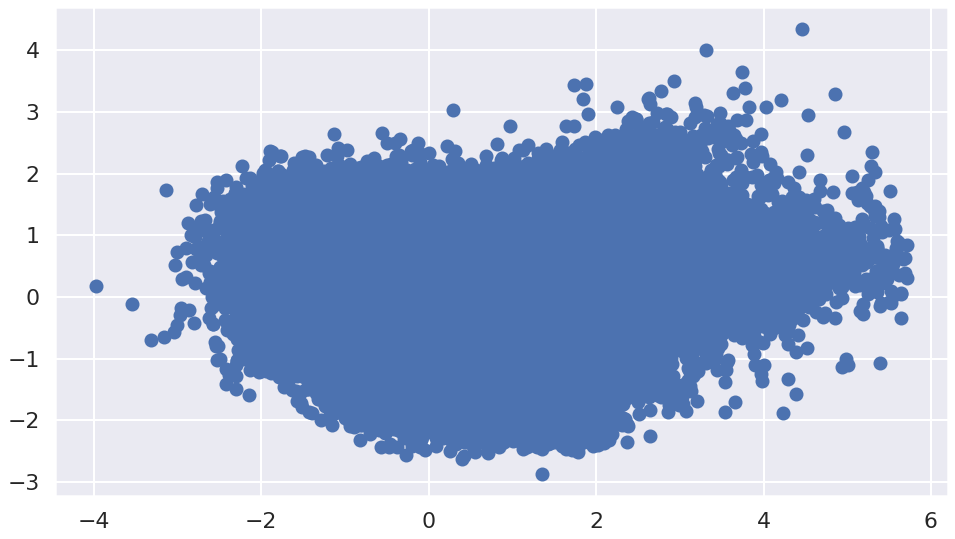

In [ ]:
X = glove_model[glove_model.vocab]
plt.figure(figsize=(16,9))
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# Create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(glove_model.vocab)
plt.savefig("glove_complete-embedding_PCA.png", format='png', dpi=150, bbox_inches='tight')
plt.show()